**PLACEMENT PREDICTION PROJECT USING MACHINE LEARNING**

OVERVIEW:
This project aims to predict student placement outcomes based on various academic and demographic features like CGPA, MARKS, INTERNSHIPS, PROJECTS etc. Using multiple machine learning models, the system determines the probability of a student getting placed, thereby helping students understand key factors influencing placement success.

MODELS USED:
1. Logistic Regression
2. Support Vector Machine (SVM) 
3. Decision Tree
4. Random Forest

DATA PROCESSING & VISUALISATION:
1. Python Libraries Used-
           a. NumPy – Numerical computations
           b. Pandas – Data manipulation and preprocessing
           c. Matplotlib & Seaborn – Data visualization
2. Graphical Representations-
           a. Correlation Matrix – Identifies relationships between features
           b. Pairplot – Visualizes pairwise feature distributions

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


GRAPHICAL REPRESENTATION 
 1. CORRELATION MATRIX 
 2. PAIRPLOT


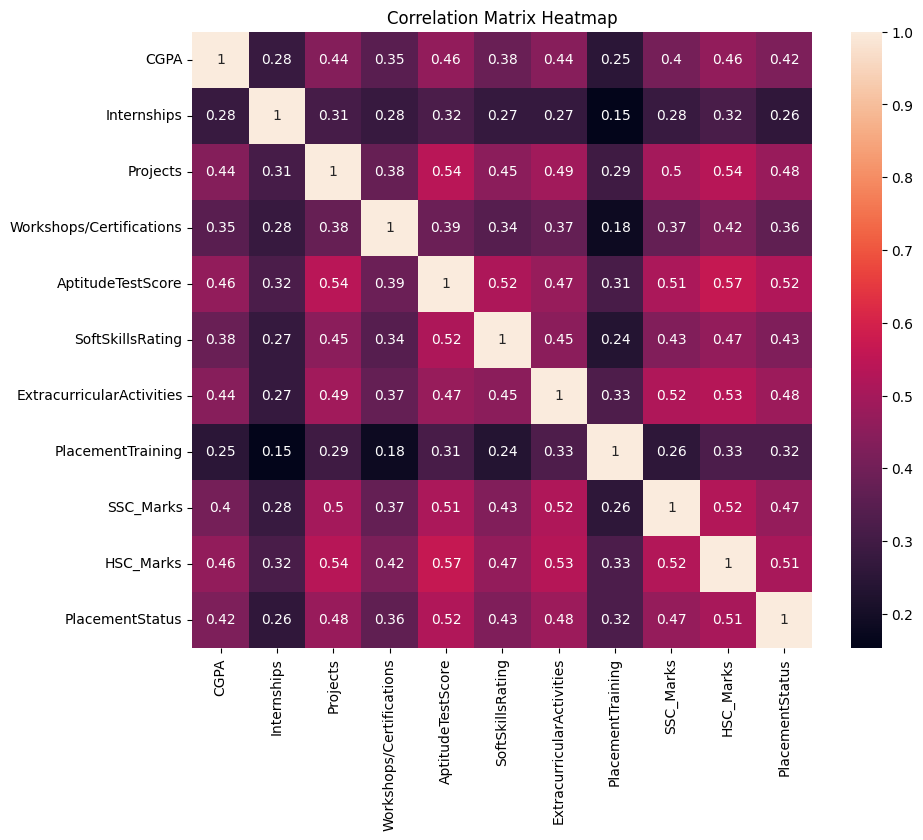

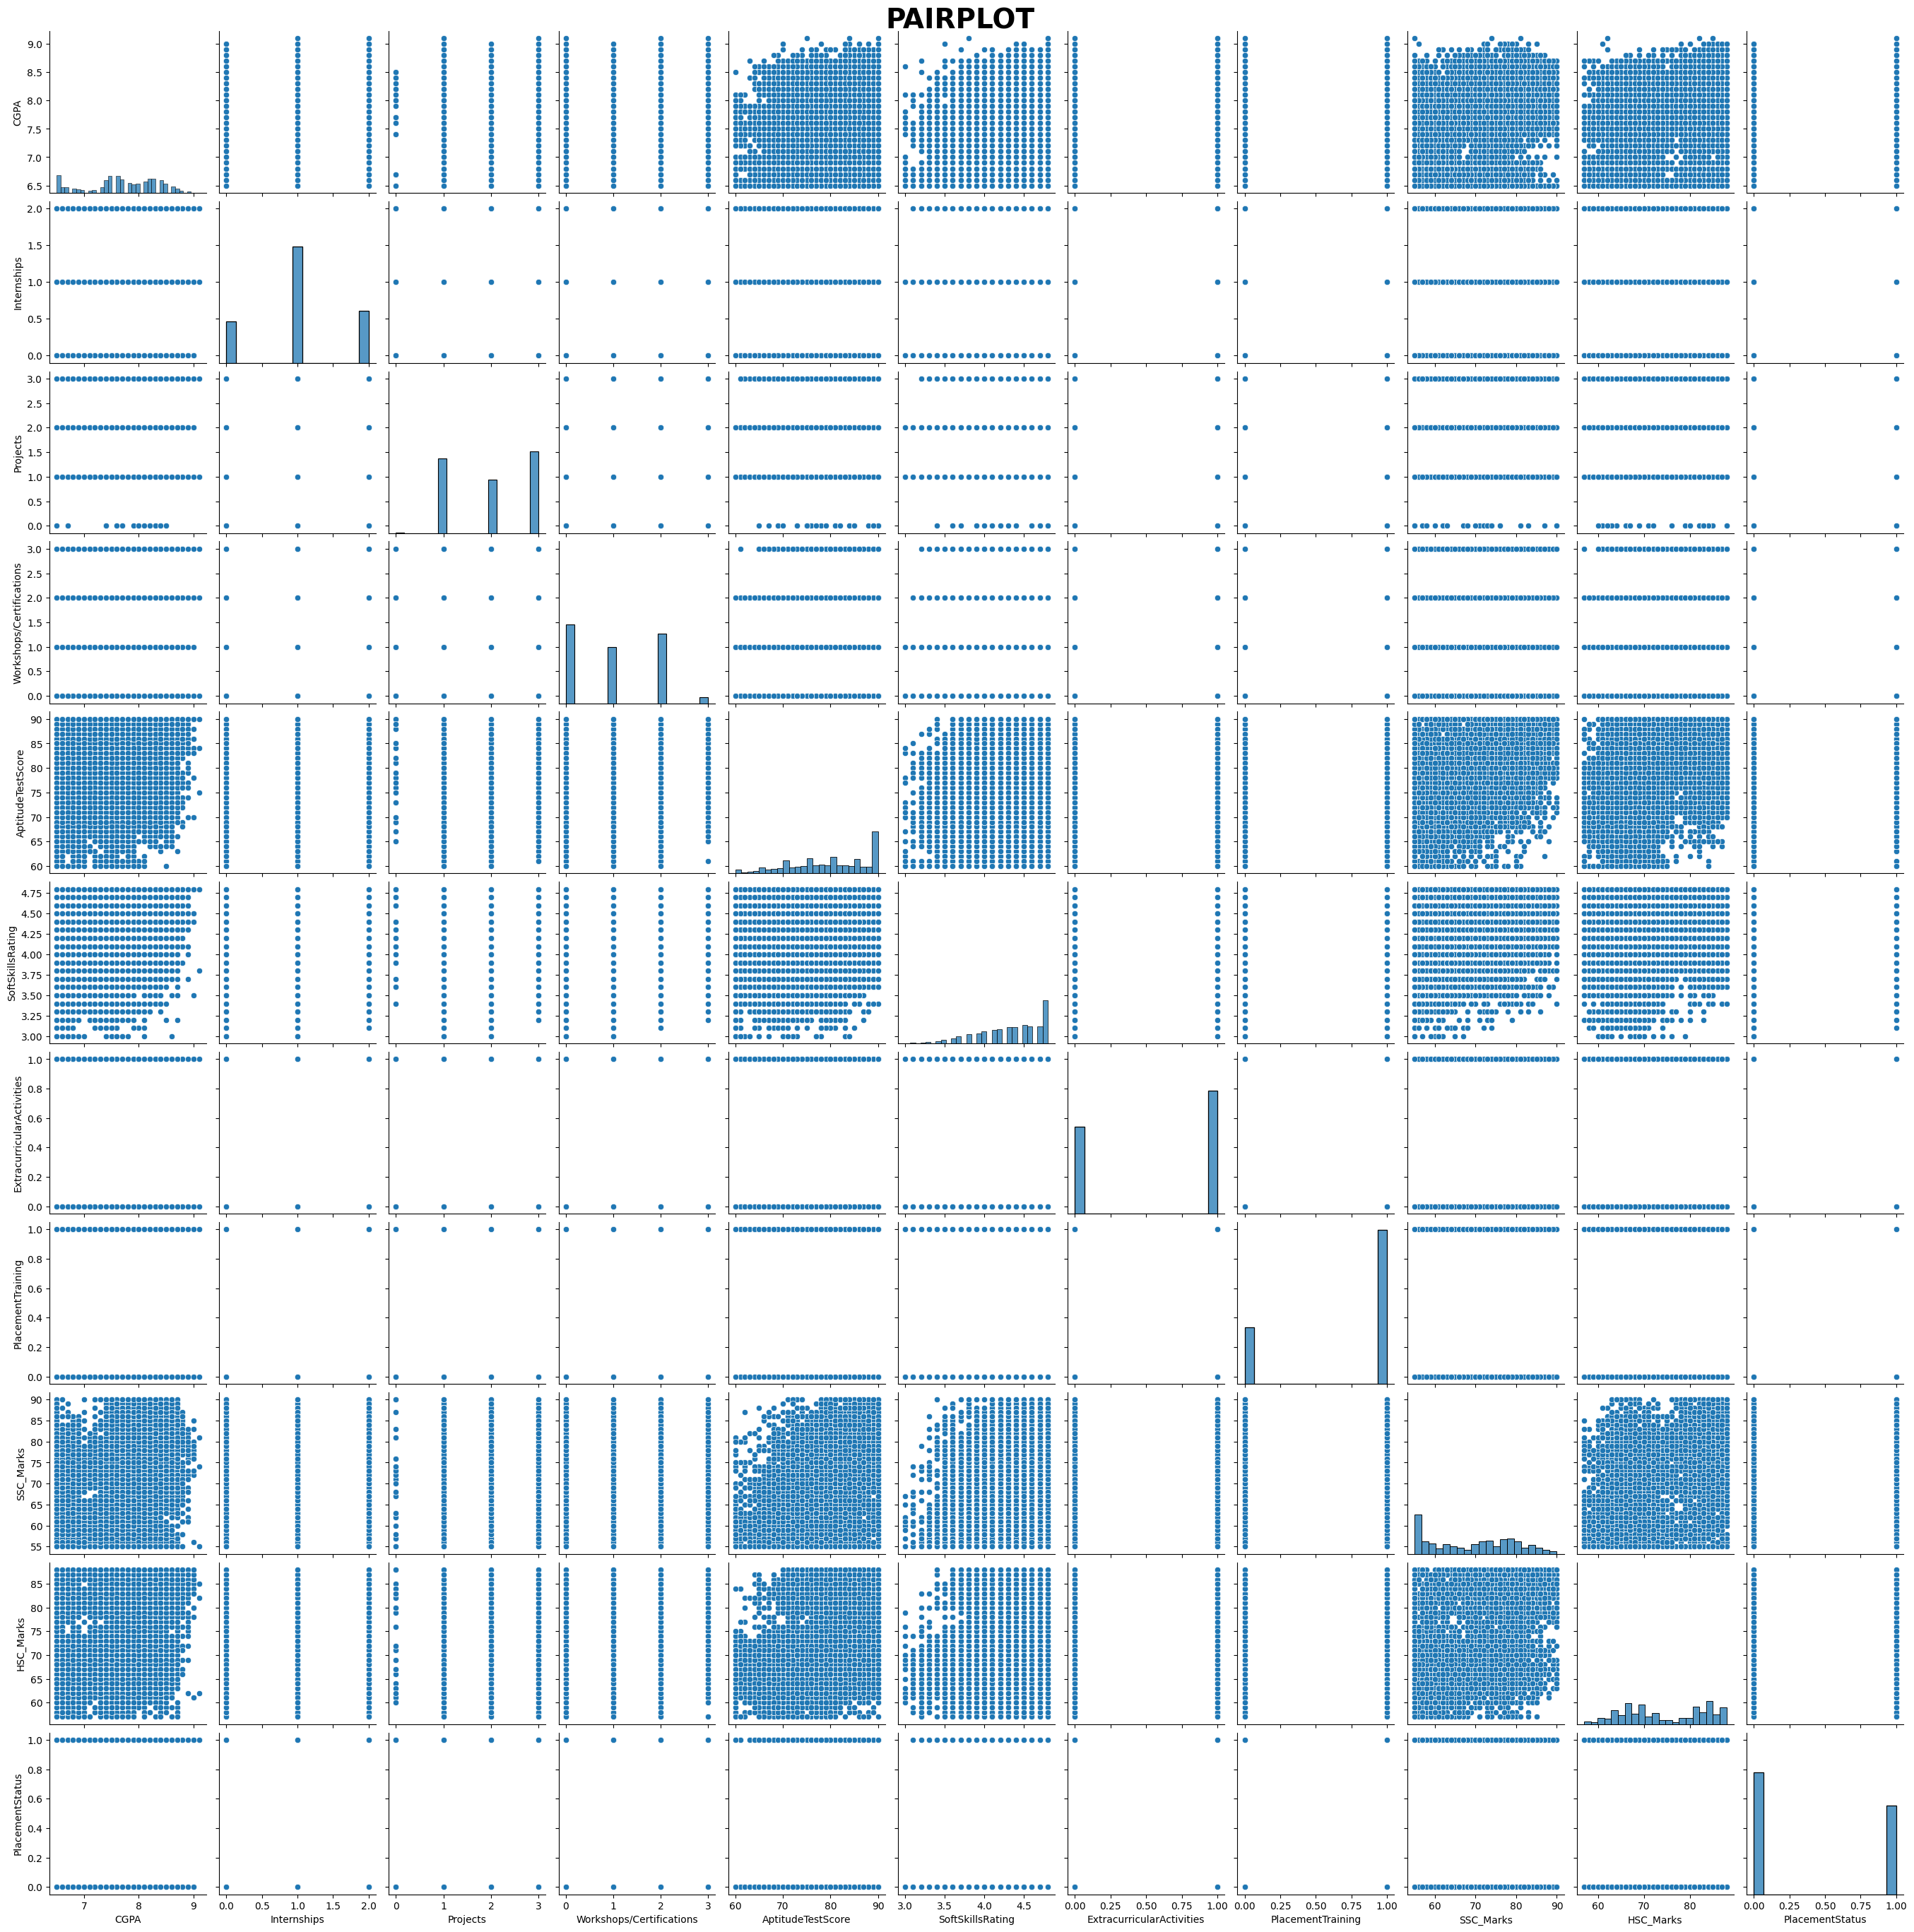

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

#loading the dataset
df=pd.read_csv('placement.csv')
print(df.head())

#checking for null values
print("\nTotal null values in each column:")
print(df.isnull().sum())

#dropping unecessary columns
df = df.drop(columns=['StudentID'])

#converting categorical data into numerical form
label_encoder = LabelEncoder()
df['ExtracurricularActivities'] = LabelEncoder().fit_transform(df['ExtracurricularActivities'])
df['PlacementTraining'] = LabelEncoder().fit_transform(df['PlacementTraining'])
df['PlacementStatus'] = LabelEncoder().fit_transform(df['PlacementStatus'])

#displaying the dataset
display(df)

#graphical representation of the given dataset
print("GRAPHICAL REPRESENTATION \n 1. CORRELATION MATRIX \n 2. PAIRPLOT")

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

sns.pairplot(df)
plt.suptitle("PAIRPLOT", y=1.0, fontsize=28, fontweight='bold')
plt.show()

#splitting data into features(X) & target variable(y)
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']

#splitting data into training & testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#converts numerical values into a similar scale(0-1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LOGISTIC REGRESSION**

In [2]:
#training the model
model = LogisticRegression()
model.fit(X_train, y_train)

#making predicitions
y_pred = model.predict(X_test)

#evaluating the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm=pd.DataFrame(cm, index=['Actual Negative','Actual Positive'], columns=['Predicted Negative','Predicted Positive']) 

print("EVALUATION FOR LOGISTIC REGRESSION")
print("ACCURACY: \n", accuracy)
print("\nPRECISION: \n", precision)
print("\nREPORT: \n", report)
print("\nCONFUSION MATRIX: \n", cm)

EVALUATION FOR LOGISTIC REGRESSION
ACCURACY: 
 0.7945

PRECISION: 
 0.7444314185228605

REPORT: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000


CONFUSION MATRIX: 
                  Predicted Negative  Predicted Positive
Actual Negative                 954                 218
Actual Positive                 193                 635


**SUPPORT VECTOR MACHINE**

In [3]:
#training the model
model = SVC()
model.fit(X_train, y_train)

#making predicitions
y_pred = model.predict(X_test)

#evaluating the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm=pd.DataFrame(cm, index=['Actual Negative','Actual Positive'], columns=['Predicted Negative','Predicted Positive']) 

print("EVALUATION FOR SUPPORT VECTOR MACHINE(SVM)")
print("ACCURACY: \n", accuracy)
print("\nPRECISION: \n", precision)
print("\nREPORT: \n", report)
print("\nCONFUSION MATRIX: \n", cm)

EVALUATION FOR SUPPORT VECTOR MACHINE(SVM)
ACCURACY: 
 0.793

PRECISION: 
 0.7524390243902439

REPORT: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1172
           1       0.75      0.75      0.75       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000


CONFUSION MATRIX: 
                  Predicted Negative  Predicted Positive
Actual Negative                 969                 203
Actual Positive                 211                 617


**RANDOM FOREST CLASSIFIER**

In [4]:
#training the model
model= RandomForestClassifier(n_estimators=100, random_state=5)
model.fit(X_train, y_train)

#making predcitions
y_pred=model.predict(X_test)

#evaluating the model's predcitions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm=pd.DataFrame(cm, index=['Actual Negative','Actual Positive'], columns=['Predicted Negative','Predicted Positive']) 

print("EVALUATION FOR RANDOM FOREST CLASSIFIER")
print("ACCURACY: \n", accuracy)
print("\nPRECISION: \n", precision)
print("\nREPORT: \n", report)
print("\nCONFUSION MATRIX: \n", cm)

EVALUATION FOR RANDOM FOREST CLASSIFIER
ACCURACY: 
 0.782

PRECISION: 
 0.745

REPORT: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1172
           1       0.74      0.72      0.73       828

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000


CONFUSION MATRIX: 
                  Predicted Negative  Predicted Positive
Actual Negative                 968                 204
Actual Positive                 232                 596


**DECISION TREE CLASSIFIER**

In [5]:
#training the model
model=DecisionTreeClassifier()

#making predictions
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#evaluating the model's predicitions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm=pd.DataFrame(cm, index=['Actual Negative','Actual Positive'], columns=['Predicted Negative','Predicted Positive']) 

print("EVALUATION FOR DECISION TREE CLASSIFIER")
print("ACCURACY: \n", accuracy)
print("\nPRECISION: \n", precision)
print("\nREPORT: \n", report)
print("\nCONFUSION MATRIX: \n", cm,"\n \n")

EVALUATION FOR DECISION TREE CLASSIFIER
ACCURACY: 
 0.728

PRECISION: 
 0.6682464454976303

REPORT: 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      1172
           1       0.67      0.68      0.67       828

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000


CONFUSION MATRIX: 
                  Predicted Negative  Predicted Positive
Actual Negative                 892                 280
Actual Positive                 264                 564 
 






RESULT & ANALYSIS:
1. Logistic Regression performed best, making it the preferred choice for this classification problem.
2. SVM showed strong results due to its ability to handle complex decision boundaries effectively.
3. Random Forest provided a balance between interpretability and accuracy but was less effective than SVM and Logistic Regression.
4. Decision Tree had the lowest accuracy and was more prone to overfitting.